# WELCOME to my Bike Demand Visualization!

### Determines

#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

### Let us start with importing necessary libraries

In [128]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")
%matplotlib inline
%matplotlib notebook


#Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#!pip install termcolor
from termcolor import colored
import missingno as msno 

# !pip3 install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

In [129]:
## Useful Functions

###############################################################################

def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("duplicates were dropped", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary drop some columns!!!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
        else:
            print(df.isnull().sum()[i], '%, percentage of missing values of', i ,'less than limit', limit, '%, so we will keep it.')
    print('New shape after missing value control:', df.shape)

###############################################################################

### Read the csv and get basic information from the dataset

In [138]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000
1,2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000
2,2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000
3,2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000
4,2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000


In [131]:
df.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.000,1.000,81.000,19.000,3.000,0.000,0.000,3.000
17410,2017-01-03 20:00:00,541,5.000,1.000,81.000,21.000,4.000,0.000,0.000,3.000
17411,2017-01-03 21:00:00,337,5.500,1.500,78.500,24.000,4.000,0.000,0.000,3.000
17412,2017-01-03 22:00:00,224,5.500,1.500,76.000,23.000,4.000,0.000,0.000,3.000
17413,2017-01-03 23:00:00,139,5.000,1.000,76.000,22.000,2.000,0.000,0.000,3.000


In [132]:
df.sample(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
16068,2016-11-08 21:00:00,599,5.500,4.000,68.000,7.500,7.000,0.000,0.000,2.000
4411,2015-07-07 06:00:00,798,17.000,17.000,68.000,15.000,1.000,0.000,0.000,1.000
8292,2015-12-17 09:00:00,2147,15.000,15.000,59.000,24.000,1.000,0.000,0.000,3.000
16713,2016-12-05 19:00:00,1724,5.000,3.500,93.000,6.500,1.000,0.000,0.000,3.000
14251,2016-08-23 14:00:00,1890,29.500,29.000,37.500,18.000,1.000,0.000,0.000,1.000


In [135]:
with pd.option_context('display.max_columns', None):
    first_looking(df)
    duplicate_values(df)
    drop_columns(df,[])
    drop_null(df, 90)

Shape:(17414, 10)
There is 17414 observation and 10 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB
None
-------------------------------------------------------------------------------
Number of Uniques:
timestamp       17414
cnt              3781
t1

In [136]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.000,1143.102,1085.108,0.000,257.000,844.000,1671.750,7860.000
t1,17414.000,12.468,5.572,-1.500,8.000,12.500,16.000,34.000
t2,17414.000,11.521,6.615,-6.000,6.000,12.500,16.000,34.000
hum,17414.000,72.325,14.313,20.500,63.000,74.500,83.000,100.000
wind_speed,17414.000,15.913,7.895,0.000,10.000,15.000,20.500,56.500
weather_code,17414.000,2.723,2.341,1.000,1.000,2.000,3.000,26.000
is_holiday,17414.000,0.022,0.147,0.000,0.000,0.000,0.000,1.000
is_weekend,17414.000,0.285,0.452,0.000,0.000,0.000,1.000,1.000
season,17414.000,1.492,1.119,0.000,0.000,1.000,2.000,3.000


In [137]:
df.describe(include=object).T

,count,unique,top,freq
timestamp,17414,17414,2015-06-05 09:00:00,1


### Let us plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

In [139]:
df.season.value_counts(dropna=False)

0.000    4394
1.000    4387
3.000    4330
2.000    4303
Name: season, dtype: int64

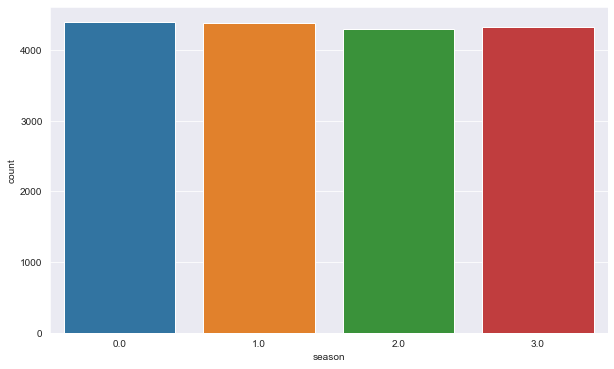

In [64]:
# season

plt.figure(figsize=(10,6))
sns.countplot(x = "season", data = df);

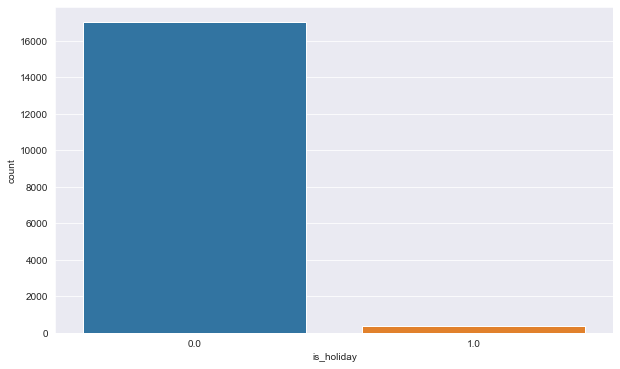

In [65]:
# is_holiday

plt.figure(figsize=(10,6))
sns.countplot(x = "is_holiday", data = df);

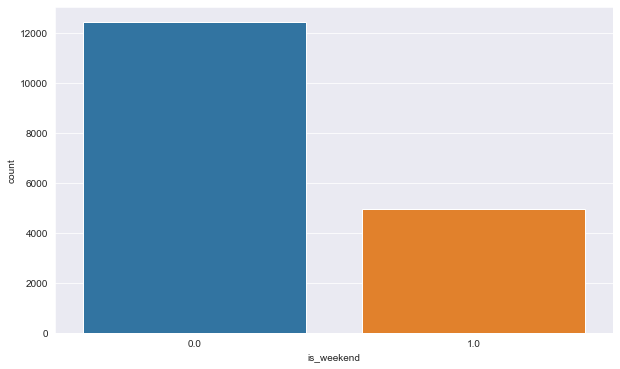

In [66]:
# is_weekend

plt.figure(figsize=(10,6))
sns.countplot(x = "is_weekend", data = df);

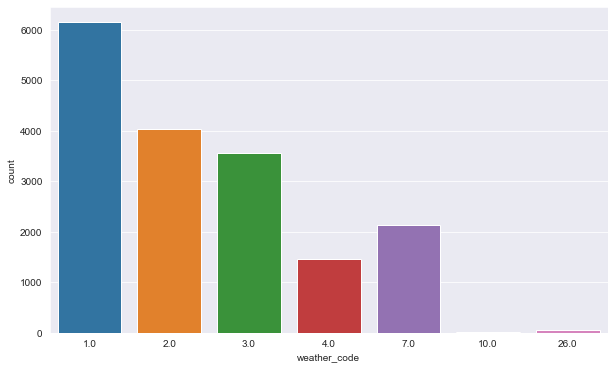

In [67]:
# weather_code

plt.figure(figsize=(10,6))
sns.countplot(x = "weather_code", data = df);

### Have a look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [41]:
df_1 = df.copy()

df_1["timestamp"] = pd.to_datetime(df_1["timestamp"])
df_1.set_index("timestamp", inplace = True)

df_1.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- I have a full 2 year timestamp. Let's do feature engineering by getting `year, month, day_of_month, day_of_week, hour` information.

### Here we are goint to make feature engineering. We will extract new columns (day of the week, day of the month, hour, month, season, year etc.)

In [42]:
from datetime import datetime

df_1["year_month"] = df_1.index.strftime('%Y-%m')
df_1["year"] = df_1.index.year
df_1["month"] = df_1.index.month
df_1["day_of_month"] = df_1.index.day
df_1["day_of_week"] = df_1.index.day_of_week
df_1["hour"] = df_1.index.hour

df_1.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [43]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### Let us visualize the correlation with a heatmap

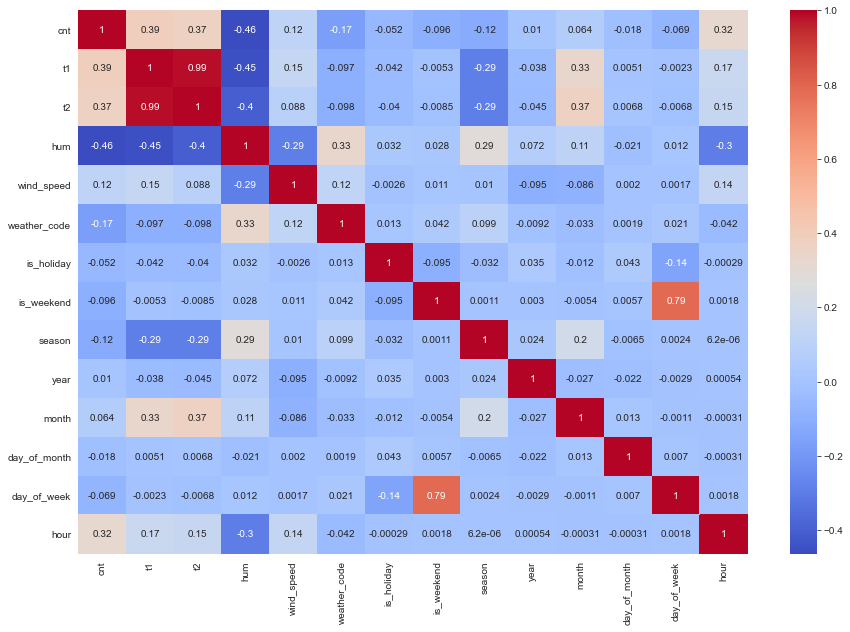

In [44]:
# heatmap for all variables

df_1_corr = df_1.drop("year_month", axis = 1)
plt.figure(figsize=(15,10))
sns.heatmap(df_1.corr(), annot = True, cmap = 'coolwarm');

In [140]:
df.corr().style.background_gradient(cmap='RdPu')

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000


In [141]:
df_temp = df.corr()

count = "Done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f"\033[1mmulticolinearity alert in between\033[0m {col} - {i}")
        else:
            print(f"For {col} and {i}, there is NO multicollinearity problem") 

print("\033[1mThe number of strong corelated features:\033[0m", count)

For cnt and cnt, there is NO multicollinearity problem
For cnt and t1, there is NO multicollinearity problem
For cnt and t2, there is NO multicollinearity problem
For cnt and hum, there is NO multicollinearity problem
For cnt and wind_speed, there is NO multicollinearity problem
For cnt and weather_code, there is NO multicollinearity problem
For cnt and is_holiday, there is NO multicollinearity problem
For cnt and is_weekend, there is NO multicollinearity problem
For cnt and season, there is NO multicollinearity problem
For t1 and cnt, there is NO multicollinearity problem
For t1 and t1, there is NO multicollinearity problem
multicolinearity alert in between t1 - t2
For t1 and hum, there is NO multicollinearity problem
For t1 and wind_speed, there is NO multicollinearity problem
For t1 and weather_code, there is NO multicollinearity problem
For t1 and is_holiday, there is NO multicollinearity problem
For t1 and is_weekend, there is NO multicollinearity problem
For t1 and season, there 

### Everthing seems to be normal between the columns

### For more clear understanding, let's visualize the correlation of the target variable and the other features with heatmap

In [45]:
target_variable = round(df_1_corr.corr().iloc[0].sort_values(ascending=False), 3)
target_variable

cnt             1.000
t1              0.389
t2              0.369
hour            0.324
wind_speed      0.116
month           0.064
year            0.010
day_of_month   -0.018
is_holiday     -0.052
day_of_week    -0.069
is_weekend     -0.096
season         -0.116
weather_code   -0.167
hum            -0.463
Name: cnt, dtype: float64

In [46]:
target_variable.index

Index(['cnt', 't1', 't2', 'hour', 'wind_speed', 'month', 'year',
       'day_of_month', 'is_holiday', 'day_of_week', 'is_weekend', 'season',
       'weather_code', 'hum'],
      dtype='object')

In [47]:
target_variable.values

array([ 1.   ,  0.389,  0.369,  0.324,  0.116,  0.064,  0.01 , -0.018,
       -0.052, -0.069, -0.096, -0.116, -0.167, -0.463])

In [48]:
target_variable_df = pd.DataFrame({"Cnt": [ 1.   ,  0.389,  0.369,  0.324,  0.116,  0.064,  0.01 , -0.018,
                                   -0.052, -0.069, -0.096, -0.116, -0.167, -0.463]},
                                    index=['cnt', 't1', 't2', 'hour', 'wind_speed', 'month', 'year',
                                    'day_of_month', 'is_holiday', 'day_of_week', 'is_weekend', 'season',
                                    'weather_code', 'hum'])

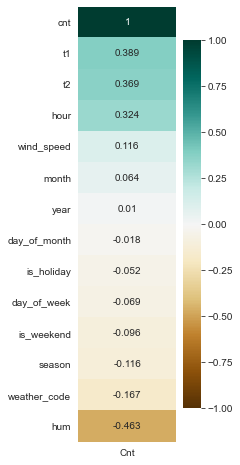

In [49]:
# heatmap for target variable

plt.figure(figsize=(2.2,8))
sns.heatmap(target_variable_df, vmin=-1, vmax=1, annot=True, fmt="g", cmap = 'BrBG')
plt.show()

### Let us visualize the correlation of the target variable and the other features with barplot

In [50]:
target_variable = round(df_1_corr.corr().iloc[0].sort_values(), 3)
target_variable

hum            -0.463
weather_code   -0.167
season         -0.116
is_weekend     -0.096
day_of_week    -0.069
is_holiday     -0.052
day_of_month   -0.018
year            0.010
month           0.064
wind_speed      0.116
hour            0.324
t2              0.369
t1              0.389
cnt             1.000
Name: cnt, dtype: float64

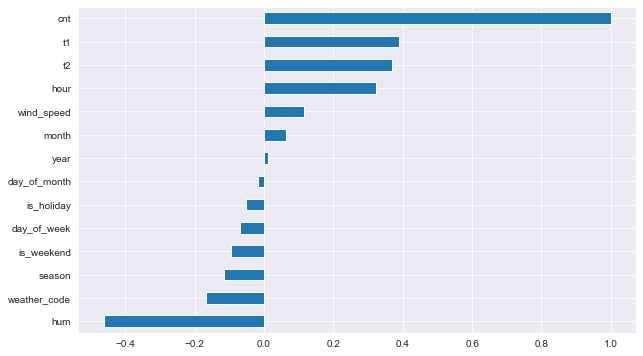

In [68]:
# correlation for target variable with pandas

plt.figure(figsize=(10,6))
target_variable.plot(x = target_variable.index, y = target_variable.values, kind = "barh", figsize = (10,6));

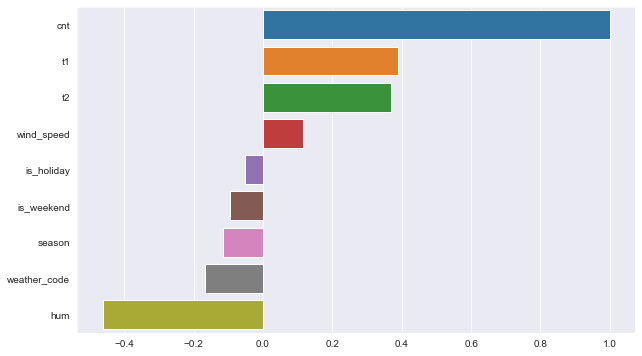

In [69]:
#correlation for target variable with seaborn

plt.figure(figsize=(10,6))
sns.barplot(x = df.corr().cnt.sort_values(ascending=False).values, 
            y=df.corr().cnt.sort_values(ascending=False).index);

### Plot bike shares over time using lineplot

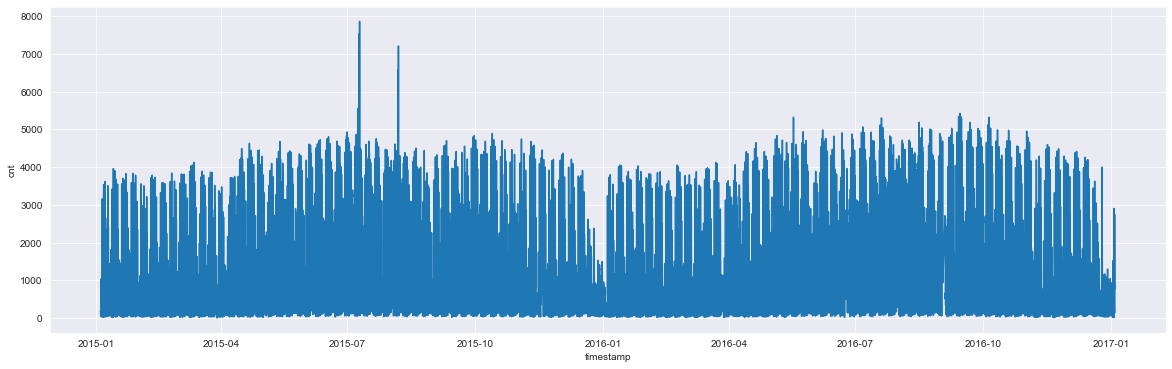

In [53]:
# seaborn

plt.figure(figsize=(20,6))
sns.lineplot(data = df_1, x = df_1.index, y = "cnt")

plt.show()

<AxesSubplot:>

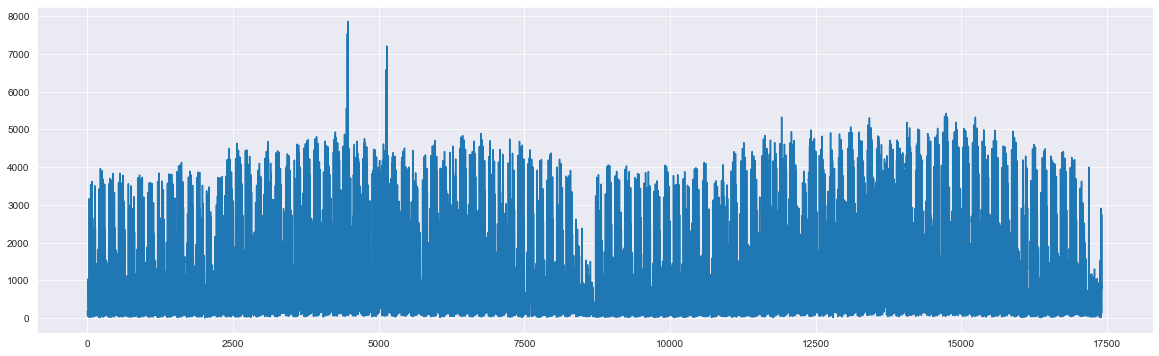

In [54]:
# matplotlib 

plt.figure(figsize=(20,6))
df.cnt.plot.line()

### There is something unusual with the count higher then 6000. There must be something special with that values. Let us look which day they are

In [144]:
df[df["cnt"]>6000]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
4461,2015-07-09 08:00:00,7531,14.500,14.500,61.000,19.000,2.000,0.000,0.000,1.000
4469,2015-07-09 16:00:00,6033,23.000,22.000,26.000,11.000,1.000,0.000,0.000,1.000
4470,2015-07-09 17:00:00,7860,23.000,22.000,27.000,11.000,1.000,0.000,0.000,1.000
4471,2015-07-09 18:00:00,6913,22.500,21.500,29.000,13.000,1.000,0.000,0.000,1.000
5129,2015-08-06 08:00:00,6585,19.000,19.000,78.000,12.000,7.000,0.000,0.000,1.000
5138,2015-08-06 17:00:00,7208,22.500,22.500,55.000,17.500,2.000,0.000,0.000,1.000
5139,2015-08-06 18:00:00,6394,21.500,21.500,58.500,20.000,2.000,0.000,0.000,1.000


### Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [55]:
df_1.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.00000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075,2015.507810,6.514643,15.751981,2.99265,11.513265
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911,0.508157,3.452509,8.793704,2.00406,6.915893
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.00000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000,2015.000000,4.000000,8.000000,1.00000,6.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000,2016.000000,7.000000,16.000000,3.00000,12.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000,2016.000000,10.000000,23.000000,5.00000,18.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000,2017.000000,12.000000,31.000000,6.00000,23.000000


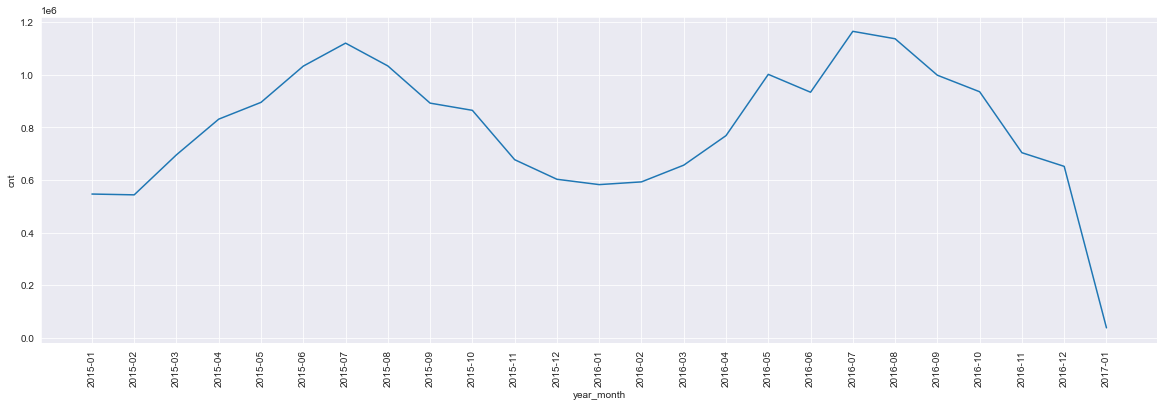

In [70]:
# with lineplot

plt.figure(figsize = (20,6))
sns.lineplot(data = df_1, x = "year_month", y = "cnt", estimator = 'sum', ci = None)
plt.xticks(rotation = 90);

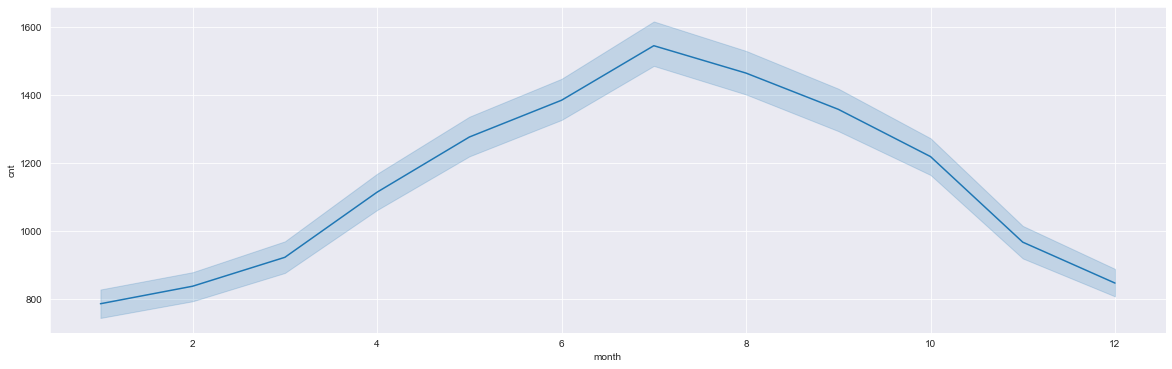

In [71]:
# with lineplot

plt.figure(figsize=(20,6))
sns.lineplot(data = df_1, x = "month", y = "cnt");

<IPython.core.display.Javascript object>


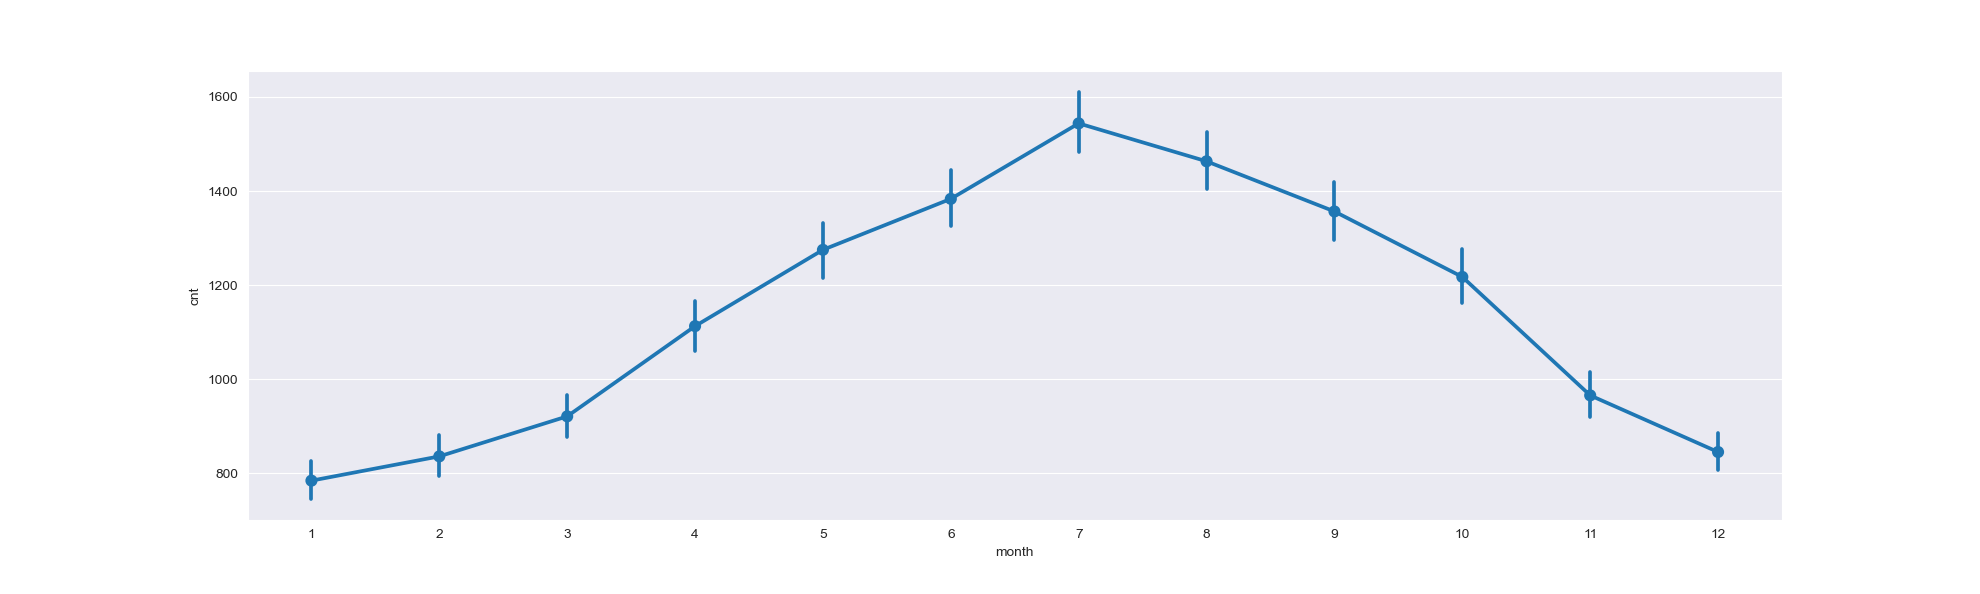

In [151]:
# with pointplot

plt.figure(figsize=(20,6))
sns.pointplot(data=df_1, x = "month", y = "cnt",  markers = "o");

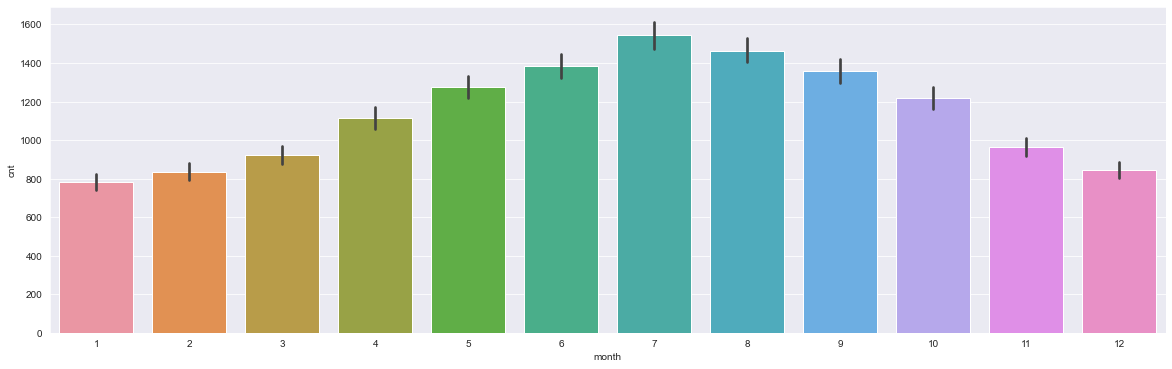

In [73]:
# with barplot

plt.figure(figsize=(20,6))
sns.barplot(data = df_1, x = "month", y = "cnt");

### As expected, in summer, bike shares is increasing

### Plot bike shares by hours on (holidays, weekend, season)

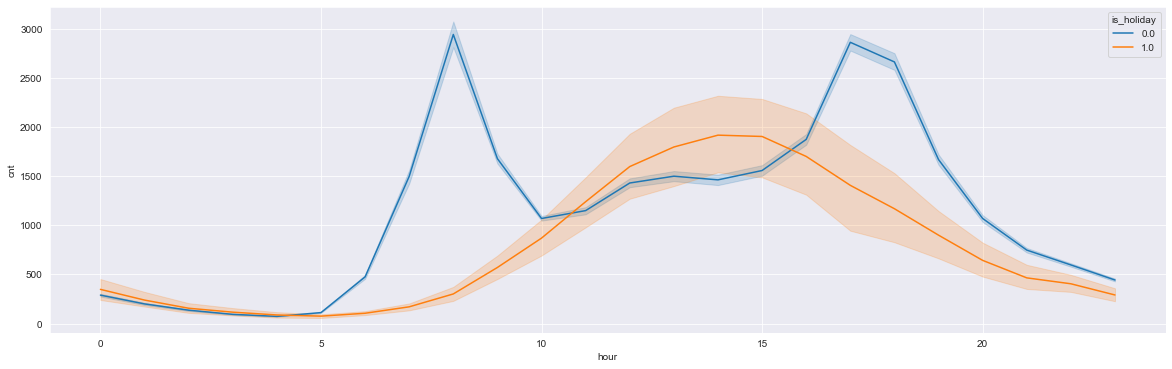

In [74]:
# with lineplot (*whether it is a holiday or not*)

plt.figure(figsize=(20,6))
sns.lineplot(data = df_1, x = "hour", y = "cnt", hue = "is_holiday");

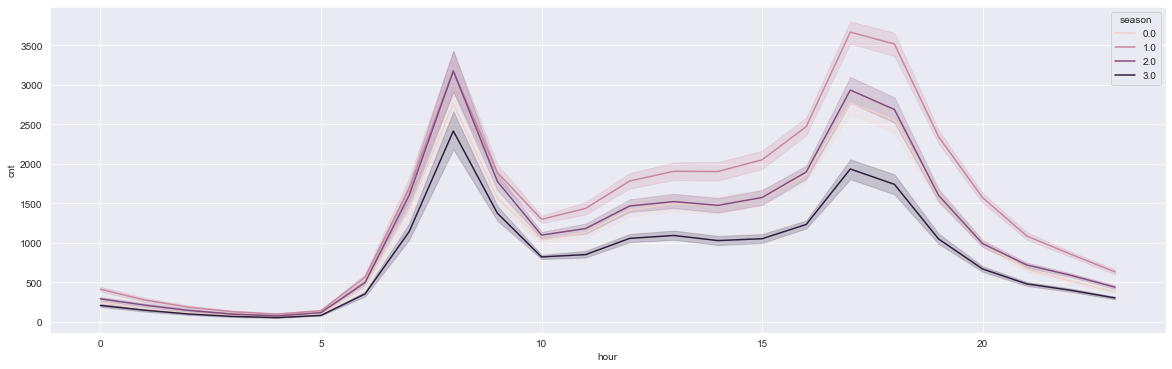

In [75]:
# with lineplot (*You may want to see seasonal breakdowns*)

plt.figure(figsize=(20,6))
sns.lineplot(data = df_1, x = "hour", y = "cnt", hue = "season");

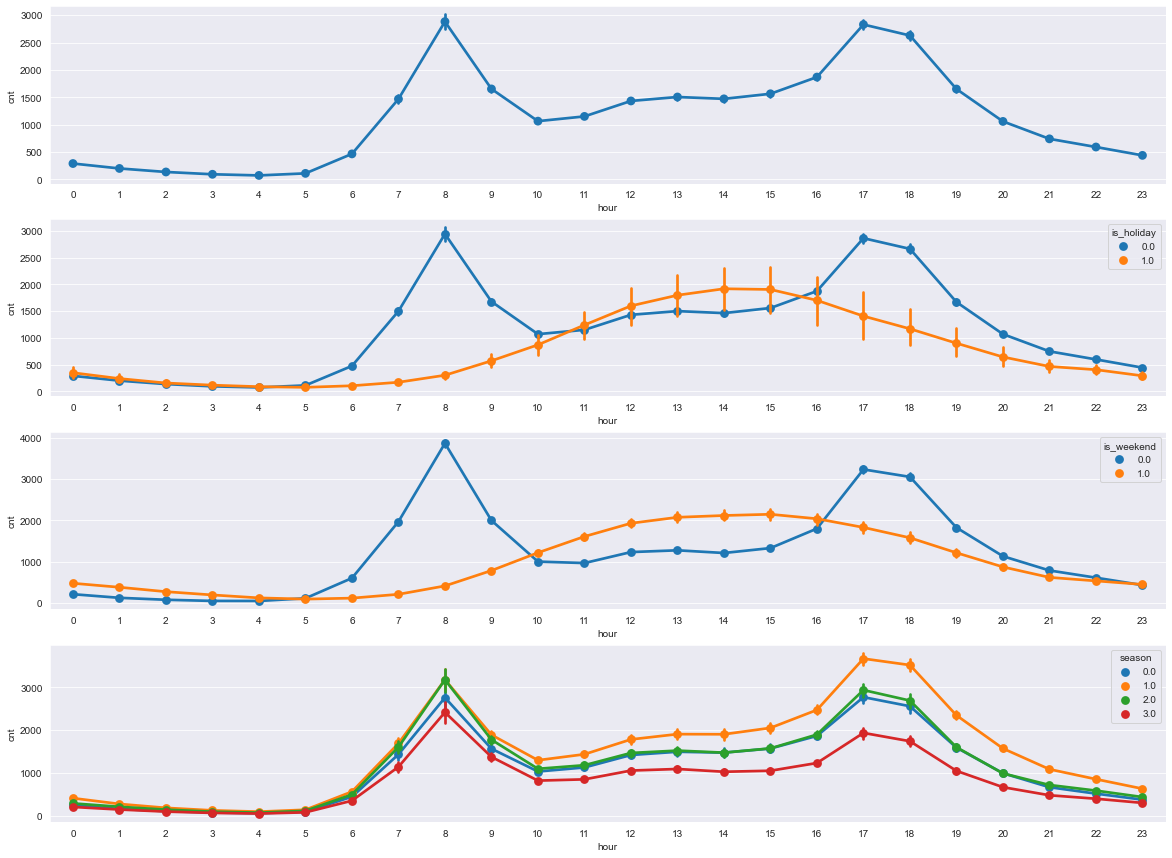

In [76]:
# with pointplot

fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (20,15))
sns.pointplot(data = df_1, x = "hour", y = "cnt", ax = ax[0])
sns.pointplot(data = df_1, x = "hour", y = "cnt", hue = "is_holiday", ax = ax[1])
sns.pointplot(data = df_1, x = "hour", y = "cnt", hue = "is_weekend", ax = ax[2])
sns.pointplot(data = df_1, x = "hour", y = "cnt", hue = "season", ax = ax[3]);

### In the mornings, 07-09 and afternoons between 16-18, bike shares is increasing

### Plot bike shares by day of week
- You may want to see whether it is a holiday or not

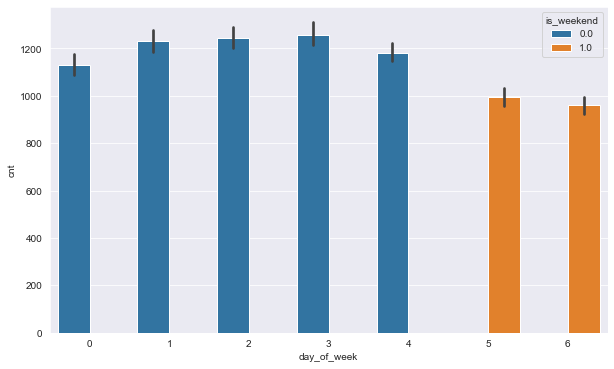

In [77]:
# with barplot

plt.figure(figsize=(10,6))
sns.barplot(data = df_1, x = "day_of_week", y = "cnt", hue = "is_weekend");

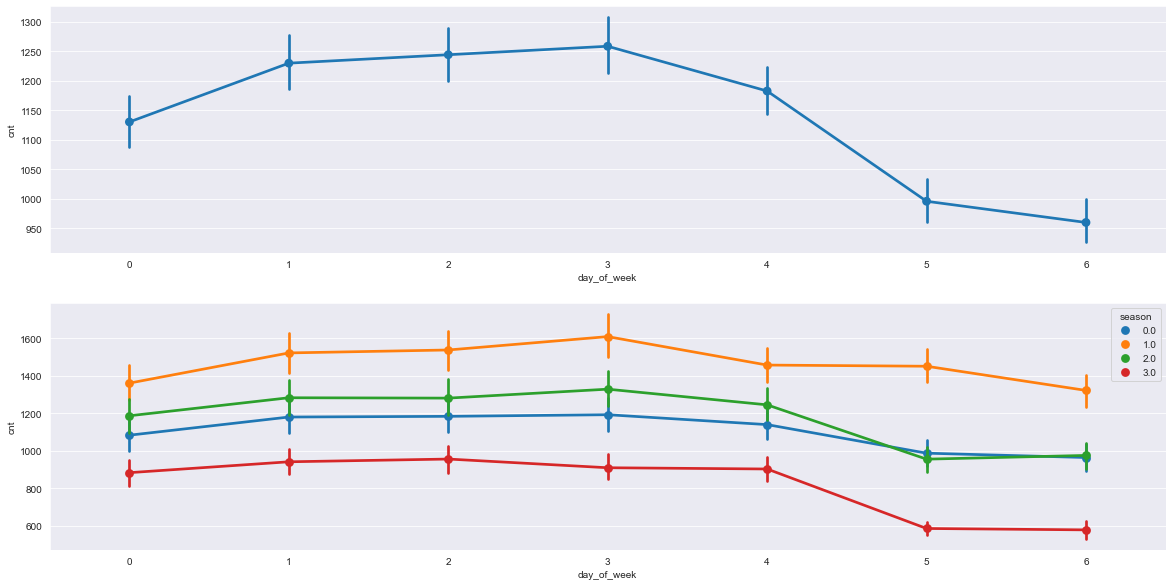

In [78]:
# with pointplot

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (20,10))
sns.pointplot(data = df_1, x = "day_of_week", y = "cnt", ax = ax[0])
sns.pointplot(data = df_1, x = "day_of_week", y = "cnt", hue = "season", ax = ax[1]);

### People tend to biking in weekdays more than weekends

### Plot bike shares by day of month

In [80]:
day_of_month = df_1.groupby('day_of_month')[['cnt']].mean().astype('int').T

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


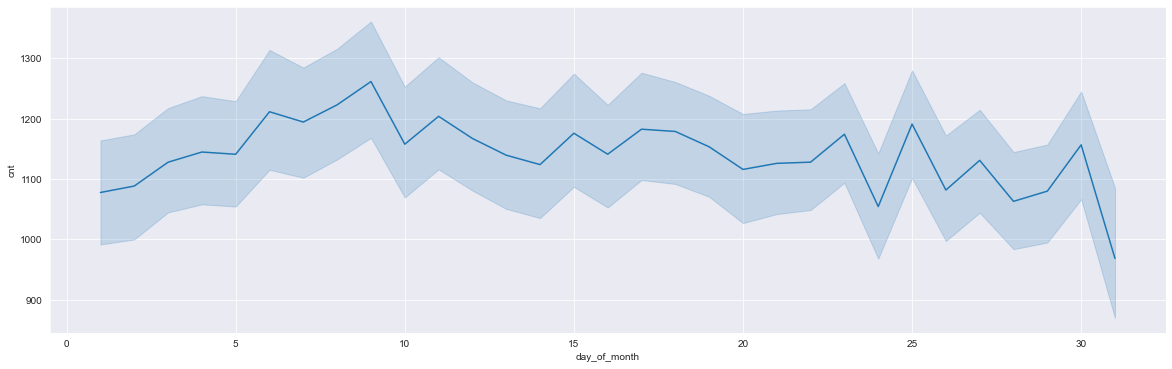

In [82]:
#with lineplot

display(day_of_month)
plt.figure(figsize=(20,6))
sns.lineplot(data = df_1, x = "day_of_month", y = "cnt", );

### Plot bike shares by year and on holidays by seasons

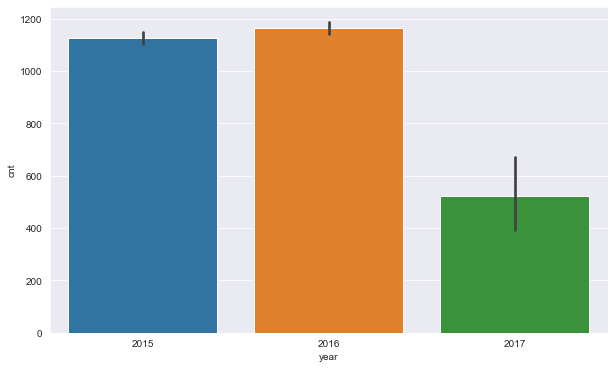

In [83]:
# with barplot

plt.figure(figsize=(10,6))
sns.barplot(data = df_1, x = "year", y = "cnt", );

### Considering that our dataset includes the observations from the beginning of 2015 to March 2017, it can be  seen that the annual usages are close to each other except for minor changes. 

In [84]:
df_1["season"] != 2.0

timestamp
2015-01-04 00:00:00    True
2015-01-04 01:00:00    True
2015-01-04 02:00:00    True
2015-01-04 03:00:00    True
2015-01-04 04:00:00    True
                       ... 
2017-01-03 19:00:00    True
2017-01-03 20:00:00    True
2017-01-03 21:00:00    True
2017-01-03 22:00:00    True
2017-01-03 23:00:00    True
Name: season, Length: 17414, dtype: bool

In [85]:
df_2 = df_1[df_1["season"] != 2]
df_2

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017-01,2017,1,3,1,19
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017-01,2017,1,3,1,20
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017-01,2017,1,3,1,21


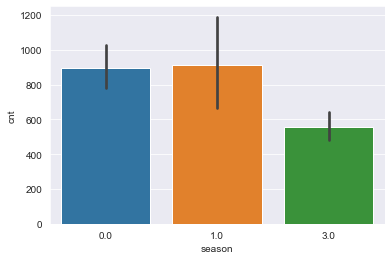

In [86]:
# with barplot

is_holiday = df[df.is_holiday == 1.0]
sns.barplot(data = is_holiday, x = "season", y = "cnt");

### Let us visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [87]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [88]:
index = ["weekday", "weekend"]
index

['weekday', 'weekend']

In [89]:
values = [12444, 4970]
values

[12444, 4970]

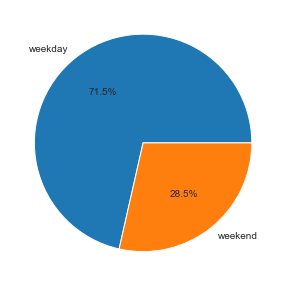

In [90]:
# pie chart

plt.figure(figsize=(7,5))
y = values
mylabels = index
myexplode = [0, 0]
plt.pie(y, labels = mylabels, labeldistance=1.1, explode = myexplode, startangle=0, autopct='%1.1f%%');

In [92]:
oran = df.is_weekend.value_counts().sum()/100

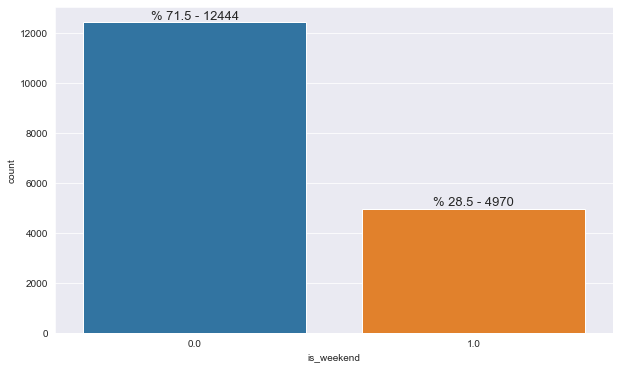

In [115]:
# with countplot

plt.figure(figsize=(10,6))
sns.countplot(data = df, x = "is_weekend");
for index,value in enumerate(df.is_weekend.value_counts()):
    plt.text(index, value, f"% {value/oran:.3} - {value}", ha="center", va="bottom", fontsize = 13)

### Let us plot the distribution of weather code by seasons

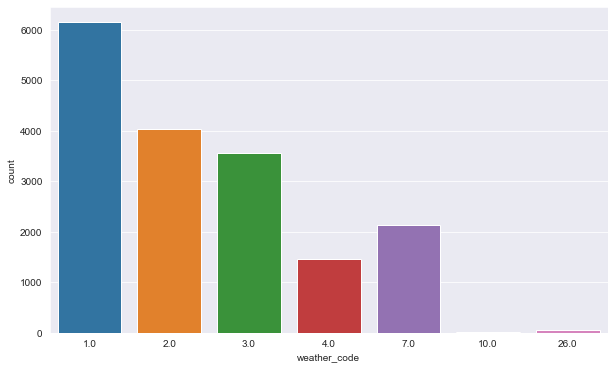

In [94]:
# with countplot

plt.figure(figsize=(10,6))
sns.countplot(x = "weather_code", data = df_1);

<Figure size 432x288 with 0 Axes>

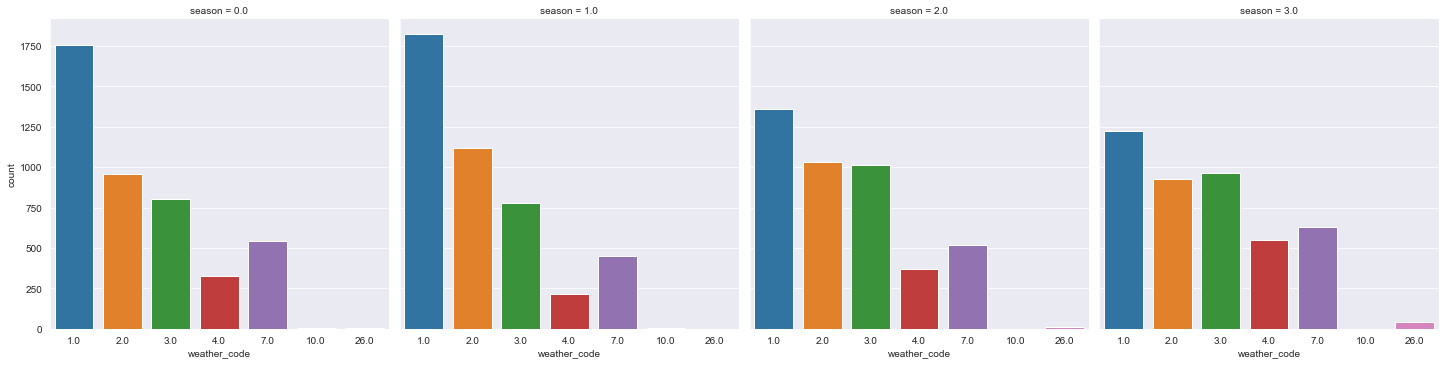

In [95]:
# with catplot

plt.figure(figsize=(6,4))
sns.catplot(x = "weather_code", col = "season", col_wrap = 4, data = df_1, kind="count");

### Visulaize all the continuous variables with histogram and scatterplot

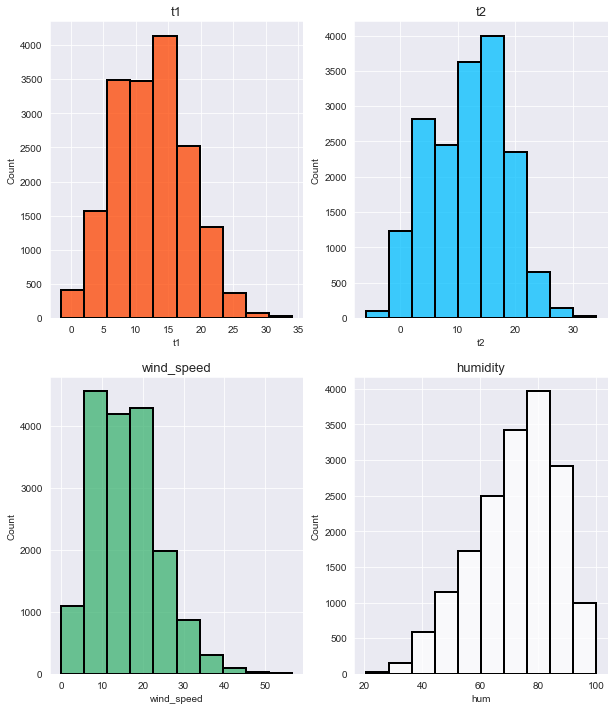

In [97]:
# matplotlip hist

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,12))
sns.histplot(data=df_1, x ="t1", ax = ax[0][0], bins = 10, stat = "count", color = "orangered", edgecolor = "black", linewidth = 2).set_title("t1", fontsize = 13)
sns.histplot(data=df_1, x ="t2", ax = ax[0][1], bins = 10, stat = "count", color = "deepskyblue", edgecolor = "black", linewidth = 2).set_title("t2", fontsize = 13)
sns.histplot(data=df_1, x ="wind_speed", ax = ax[1][0], bins = 10, stat = "count", color = "mediumseagreen", edgecolor = "black", linewidth = 2).set_title("wind_speed", fontsize = 13)
sns.histplot(data=df_1, x ="hum", ax = ax[1][1], bins = 10, stat = "count",  color = "white", edgecolor = "black", linewidth = 2).set_title("humidity", fontsize = 13);

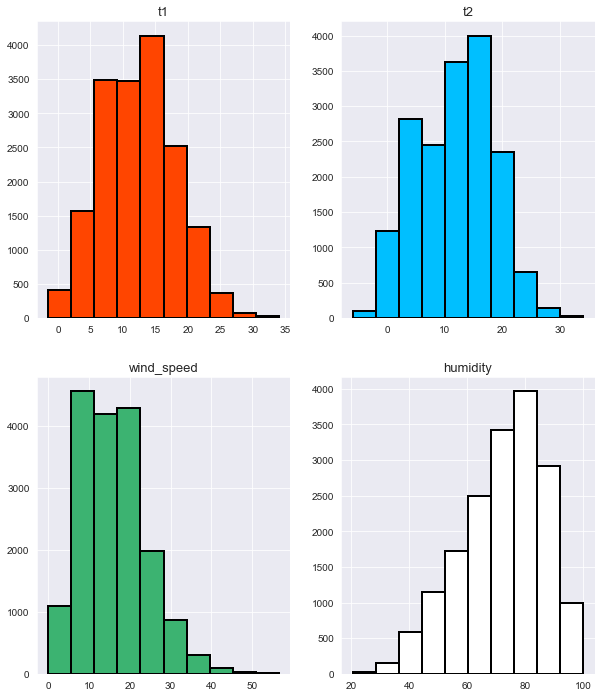

In [98]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize = (10,12))

axes[0][0].hist(df_1["t1"], bins = 10, color = "orangered", edgecolor = "black", linewidth = 2)
axes[0][1].hist(df_1["t2"], bins = 10, color = "deepskyblue", edgecolor = "black", linewidth = 2)
axes[1][0].hist(df_1["wind_speed"], bins = 10, color = "mediumseagreen", edgecolor = "black", linewidth = 2)
axes[1][1].hist(df_1["hum"], bins = 10, color = "White", edgecolor = "black", linewidth = 2)

axes[0][0].set_title("t1", fontsize = 13)
axes[0][1].set_title("t2", fontsize = 13)
axes[1][0].set_title("wind_speed", fontsize = 13)
axes[1][1].set_title("humidity", fontsize = 13);

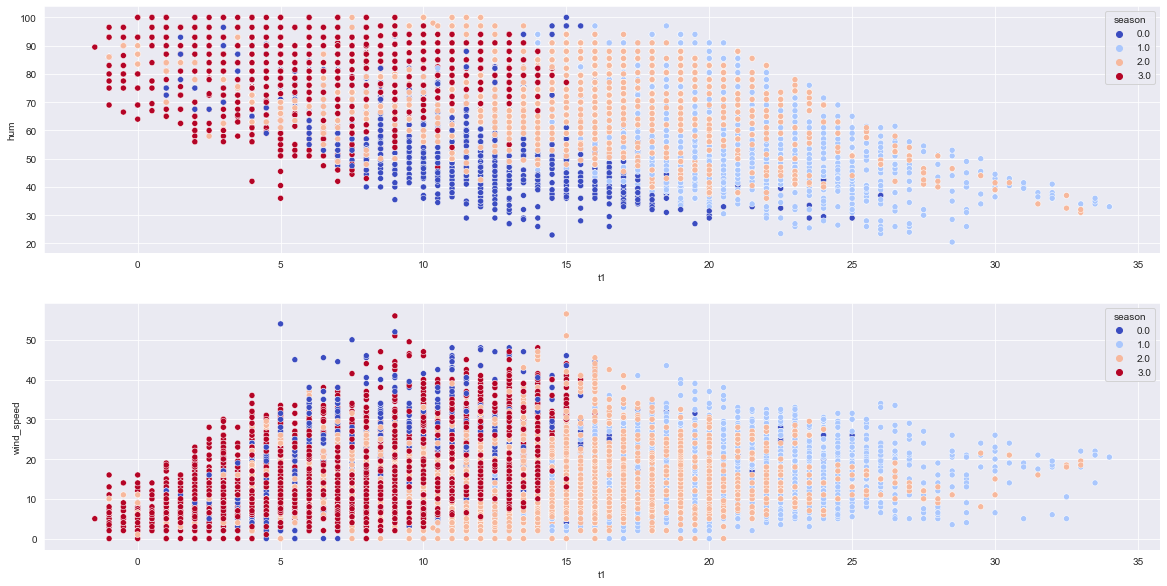

In [99]:
# with seaborn scatterplot

fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (20,10))

sns.scatterplot(x = "t1", y = "hum", hue = "season", data = df_1, ax = ax[0], palette = "coolwarm")
sns.scatterplot(x = "t1", y = "wind_speed", hue = "season", data = df_1, ax = ax[1], palette = "coolwarm");

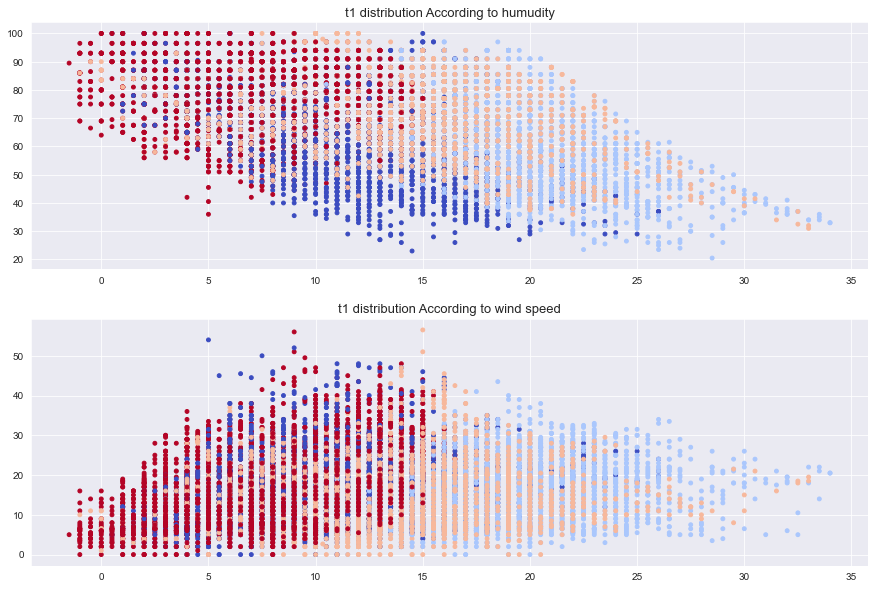

In [121]:
# with matplotlib scatterplot

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.scatter(data=df, x="t1", y="hum", c="season", cmap="coolwarm", s = 15)
plt.title("t1 distribution According to humudity", fontsize = 13)
plt.subplot(2,1,2)
plt.scatter(data=df, x="t1", y="wind_speed", c="season", cmap="coolwarm", s = 15)
plt.title("t1 distribution According to wind speed", fontsize = 13);

### We have come to the end of the visualization work I tried to do about this data set. I tried to use Seaborn and Matplotlib libraries.Looking forward to your feedback. Thanks a lot.